# Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

import warnings 
warnings.simplefilter('ignore', 'r')

# Data

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

display(test.head())
display(train.head())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
print('train set shape: {}'.format(train.shape))
print('test set shape: {}'.format(test.shape))

train set shape: (8523, 12)
test set shape: (5681, 11)


In [4]:
def unique_count(df):
    unique_value = []
    col_name = []
    unique_count =[]
    for col in df.columns:
        col_name.append(col)
        unique_count.append(df[col].nunique())
        unique_value.append(df[col].unique())
    temp1 = pd.DataFrame({'unique_count': unique_count, 'unique_value': unique_value}, index=col_name)
    return temp1

display(unique_count(train))
display(unique_count(test))

,unique_count,unique_value
Item_Identifier,1559,"[FDA15, DRC01, FDN15, FDX07, NCD19, FDP36, FDO..."
Item_Weight,415,"[9.3, 5.92, 17.5, 19.2, 8.93, 10.395, 13.65, n..."
Item_Fat_Content,5,"[Low Fat, Regular, low fat, LF, reg]"
Item_Visibility,7880,"[0.016047301, 0.019278216, 0.016760075, 0.0, 0..."
Item_Type,16,"[Dairy, Soft Drinks, Meat, Fruits and Vegetabl..."
Item_MRP,5938,"[249.8092, 48.2692, 141.618, 182.095, 53.8614,..."
Outlet_Identifier,10,"[OUT049, OUT018, OUT010, OUT013, OUT027, OUT04..."
Outlet_Establishment_Year,9,"[1999, 2009, 1998, 1987, 1985, 2002, 2007, 199..."
Outlet_Size,3,"[Medium, nan, High, Small]"
Outlet_Location_Type,3,"[Tier 1, Tier 3, Tier 2]"


,unique_count,unique_value
Item_Identifier,1543,"[FDW58, FDW14, NCN55, FDQ58, FDY38, FDH56, FDL..."
Item_Weight,410,"[20.75, 8.3, 14.6, 7.315, nan, 9.8, 19.35, 6.3..."
Item_Fat_Content,5,"[Low Fat, reg, Regular, LF, low fat]"
Item_Visibility,5277,"[0.007564836, 0.038427677, 0.099574908, 0.0153..."
Item_Type,16,"[Snack Foods, Dairy, Others, Fruits and Vegeta..."
Item_MRP,4402,"[107.8622, 87.3198, 241.7538, 155.034, 234.23,..."
Outlet_Identifier,10,"[OUT049, OUT017, OUT010, OUT027, OUT046, OUT01..."
Outlet_Establishment_Year,9,"[1999, 2007, 1998, 1985, 1997, 2009, 2002, 198..."
Outlet_Size,3,"[Medium, nan, Small, High]"
Outlet_Location_Type,3,"[Tier 1, Tier 2, Tier 3]"


In [5]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('reg', 'Regular')
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat')

test['Item_Fat_Content'] = test['Item_Fat_Content'].replace('reg', 'Regular')
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat')

display(unique_count(train))
display(unique_count(test))

,unique_count,unique_value
Item_Identifier,1559,"[FDA15, DRC01, FDN15, FDX07, NCD19, FDP36, FDO..."
Item_Weight,415,"[9.3, 5.92, 17.5, 19.2, 8.93, 10.395, 13.65, n..."
Item_Fat_Content,2,"[Low Fat, Regular]"
Item_Visibility,7880,"[0.016047301, 0.019278216, 0.016760075, 0.0, 0..."
Item_Type,16,"[Dairy, Soft Drinks, Meat, Fruits and Vegetabl..."
Item_MRP,5938,"[249.8092, 48.2692, 141.618, 182.095, 53.8614,..."
Outlet_Identifier,10,"[OUT049, OUT018, OUT010, OUT013, OUT027, OUT04..."
Outlet_Establishment_Year,9,"[1999, 2009, 1998, 1987, 1985, 2002, 2007, 199..."
Outlet_Size,3,"[Medium, nan, High, Small]"
Outlet_Location_Type,3,"[Tier 1, Tier 3, Tier 2]"


,unique_count,unique_value
Item_Identifier,1543,"[FDW58, FDW14, NCN55, FDQ58, FDY38, FDH56, FDL..."
Item_Weight,410,"[20.75, 8.3, 14.6, 7.315, nan, 9.8, 19.35, 6.3..."
Item_Fat_Content,2,"[Low Fat, Regular]"
Item_Visibility,5277,"[0.007564836, 0.038427677, 0.099574908, 0.0153..."
Item_Type,16,"[Snack Foods, Dairy, Others, Fruits and Vegeta..."
Item_MRP,4402,"[107.8622, 87.3198, 241.7538, 155.034, 234.23,..."
Outlet_Identifier,10,"[OUT049, OUT017, OUT010, OUT027, OUT046, OUT01..."
Outlet_Establishment_Year,9,"[1999, 2007, 1998, 1985, 1997, 2009, 2002, 198..."
Outlet_Size,3,"[Medium, nan, Small, High]"
Outlet_Location_Type,3,"[Tier 1, Tier 2, Tier 3]"


In [6]:
def null_count(df):
    null_pct = []
    null_count = []
    col_name = []
    for col in df.columns:
        null_count.append(df[col].isna().sum())
        null_pct.append(round(df[col].isna().sum()/len(df.index), ndigits=2))
        col_name.append(col)
        temp = pd.DataFrame({'col_name': col_name, 'null_count': null_count, 'null_pct': null_pct}) 

    return temp

print('Test Data Null Insights')
display(null_count(test))
print('Train Data Null Insights')
display(null_count(train))

Test Data Null Insights


,col_name,null_count,null_pct
0,Item_Identifier,0,0.00
1,Item_Weight,976,0.17
2,Item_Fat_Content,0,0.00
3,Item_Visibility,0,0.00
4,Item_Type,0,0.00
5,Item_MRP,0,0.00
6,Outlet_Identifier,0,0.00
7,Outlet_Establishment_Year,0,0.00
8,Outlet_Size,1606,0.28
9,Outlet_Location_Type,0,0.00


Train Data Null Insights


,col_name,null_count,null_pct
0,Item_Identifier,0,0.00
1,Item_Weight,1463,0.17
2,Item_Fat_Content,0,0.00
3,Item_Visibility,0,0.00
4,Item_Type,0,0.00
5,Item_MRP,0,0.00
6,Outlet_Identifier,0,0.00
7,Outlet_Establishment_Year,0,0.00
8,Outlet_Size,2410,0.28
9,Outlet_Location_Type,0,0.00


In [7]:
display(train.info())
display(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


None

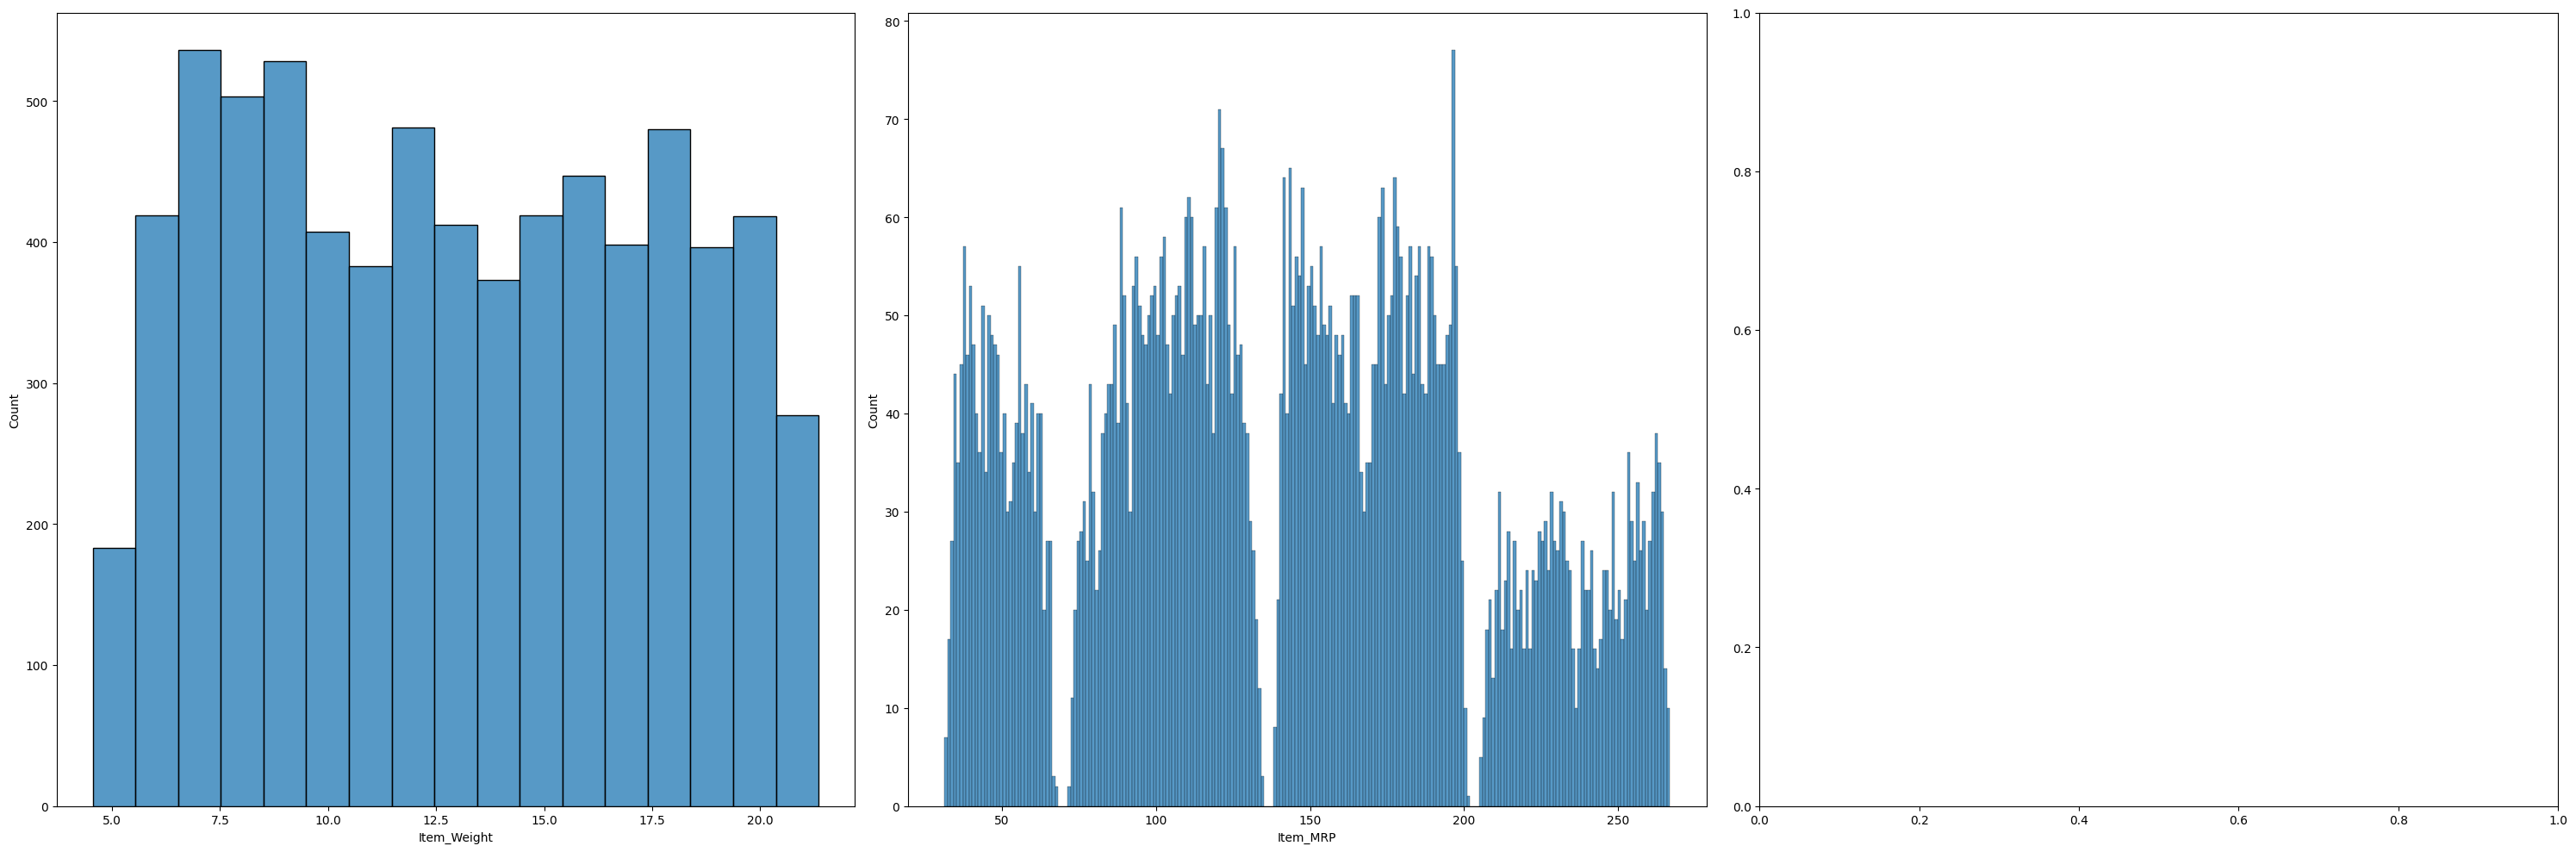

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
axs = axs.flatten()

numberic_feature = ['Item_Weight', 'Item_MRP']
for i, var in enumerate(numberic_feature):
    sns.histplot(x=var, data=train, binwidth=1, ax=axs[i])
    
fig.tight_layout()

plt.show()

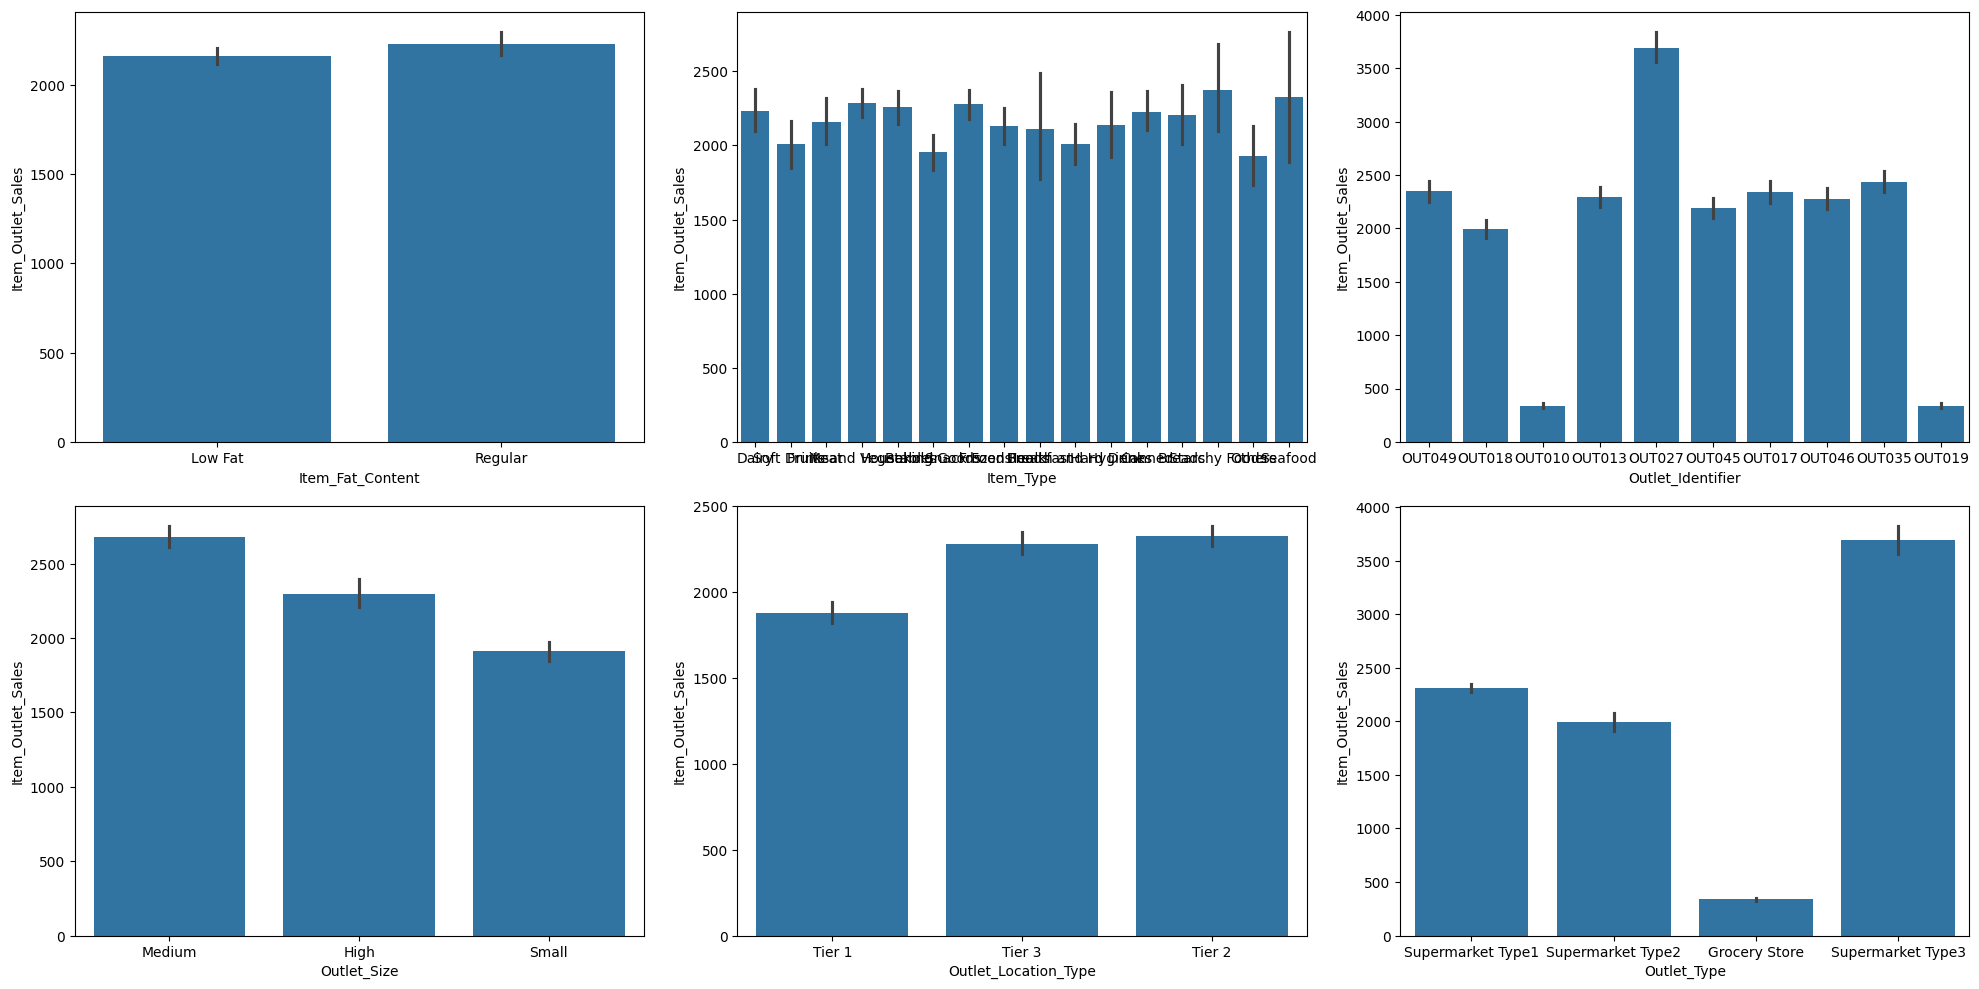

In [9]:
cat_feature = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 
               'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()
for i, var in enumerate(cat_feature):
    sns.barplot(x=var, y='Item_Outlet_Sales', data=train, ax=axs[i])

fig.tight_layout()

plt.show()

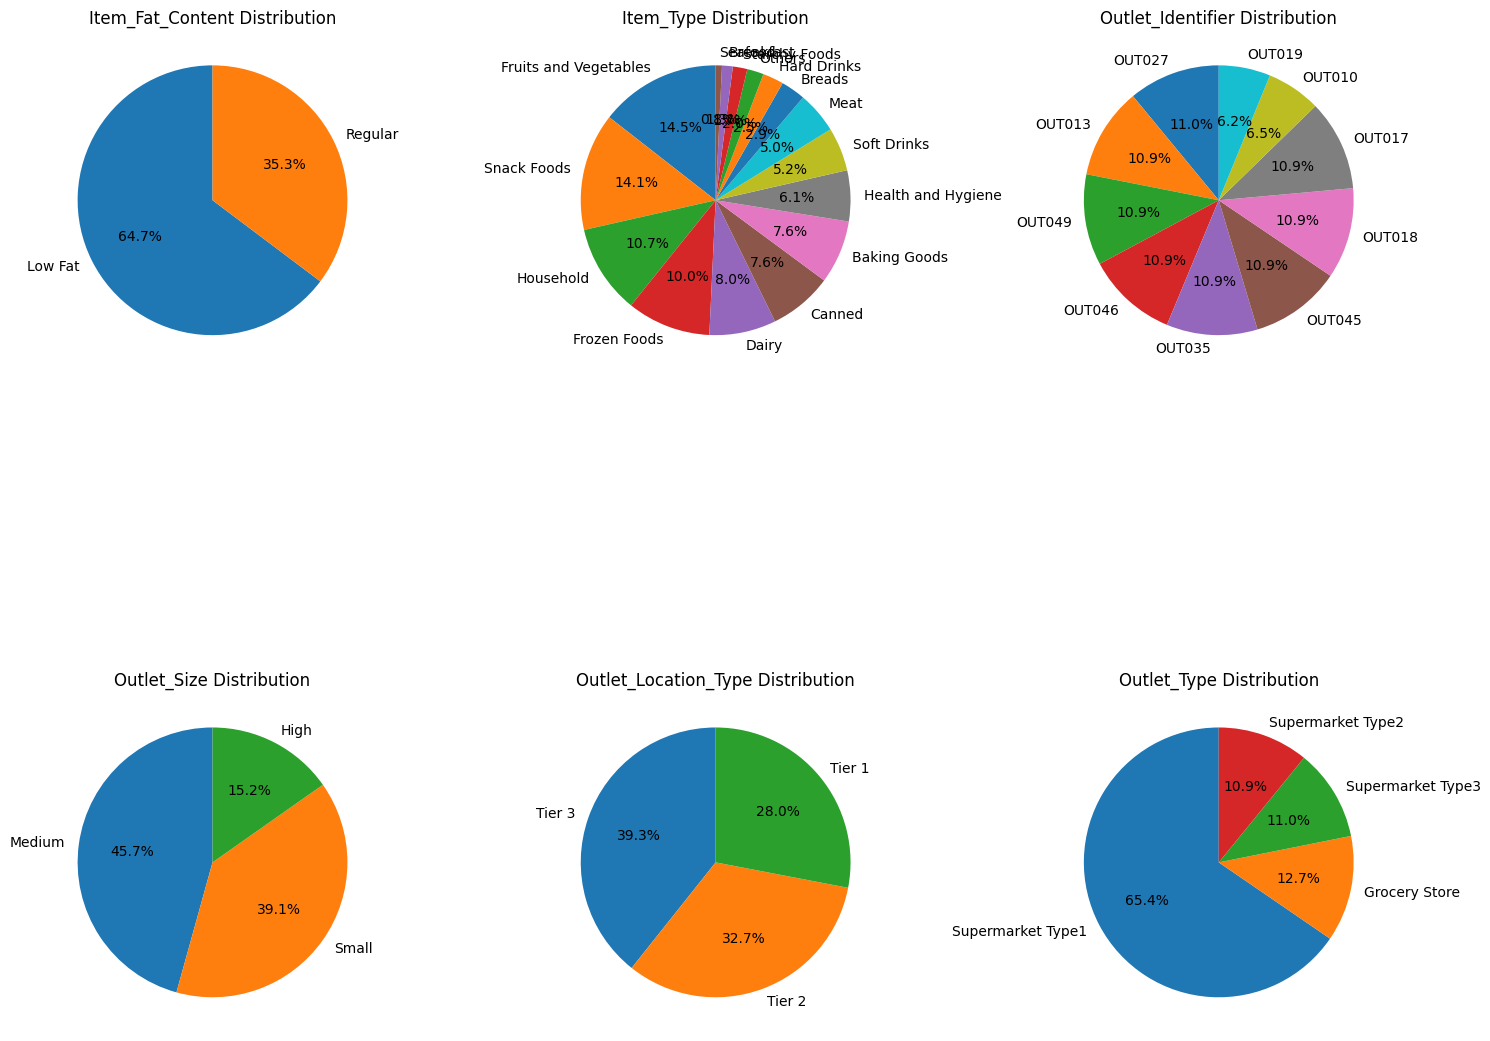

In [10]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
axs = axs.flatten()
for i, var in enumerate(cat_feature):
    cat_counts = train[var].value_counts()
    axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
    
    axs.flat[i].set_title(f'{var} Distribution')

fig.tight_layout()

plt.show()

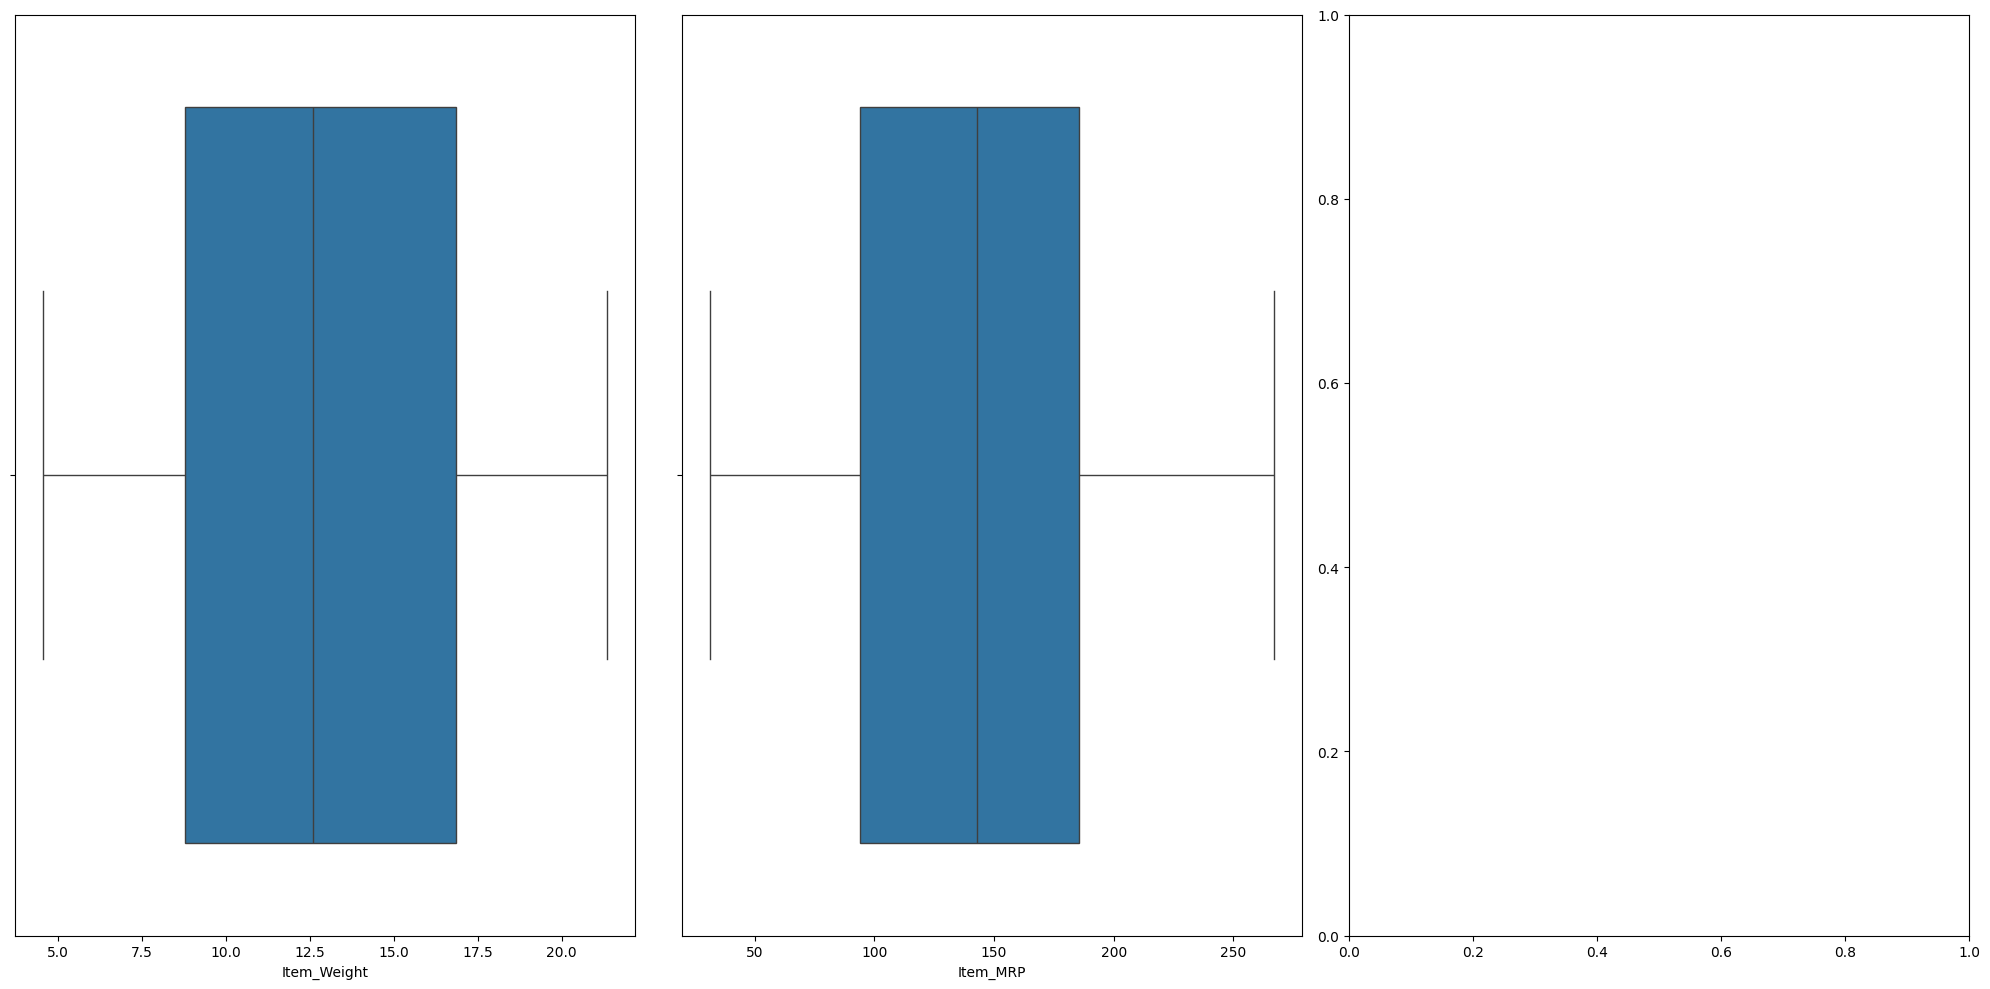

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
axs = axs.flatten()

for i, col in enumerate(numberic_feature):
    sns.boxplot(data=train, x=col, ax=axs[i])
    
fig.tight_layout()
plt.show()

In [12]:
def remove_outliner(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= (Q1 - 1.5*IQR)) & (df[col] <= (Q3 + 1.5*IQR))]
    return df
train = remove_outliner(train, 'Item_Visibility')
test = remove_outliner(test, 'Item_Visibility')

display(train.groupby('Outlet_Type')['Outlet_Size'].unique())

Outlet_Type
Grocery Store                      [nan, Small]
Supermarket Type1    [Medium, High, nan, Small]
Supermarket Type2                      [Medium]
Supermarket Type3                      [Medium]
Name: Outlet_Size, dtype: object

In [13]:
train.loc[(train['Outlet_Type']=='Grocery Store') & (train['Outlet_Size'].isna()), 'Outlet_Size'] = 'Small'
test.loc[(test['Outlet_Type']=='Grocery Store') & (test['Outlet_Size'].isna()), 'Outlet_Size'] = 'Small'

display(train.groupby('Outlet_Type')['Outlet_Size'].unique())

Outlet_Type
Grocery Store                           [Small]
Supermarket Type1    [Medium, High, nan, Small]
Supermarket Type2                      [Medium]
Supermarket Type3                      [Medium]
Name: Outlet_Size, dtype: object

In [14]:
train.dropna(subset='Outlet_Size', inplace=True)
test.dropna(subset='Outlet_Size', inplace=True)

In [15]:
display(null_count(train))
display(null_count(test))

,col_name,null_count,null_pct
0,Item_Identifier,0,0.00
1,Item_Weight,1386,0.21
2,Item_Fat_Content,0,0.00
3,Item_Visibility,0,0.00
4,Item_Type,0,0.00
5,Item_MRP,0,0.00
6,Outlet_Identifier,0,0.00
7,Outlet_Establishment_Year,0,0.00
8,Outlet_Size,0,0.00
9,Outlet_Location_Type,0,0.00


,col_name,null_count,null_pct
0,Item_Identifier,0,0.00
1,Item_Weight,920,0.21
2,Item_Fat_Content,0,0.00
3,Item_Visibility,0,0.00
4,Item_Type,0,0.00
5,Item_MRP,0,0.00
6,Outlet_Identifier,0,0.00
7,Outlet_Establishment_Year,0,0.00
8,Outlet_Size,0,0.00
9,Outlet_Location_Type,0,0.00


In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

def label_encoder(df):
    for col in df.select_dtypes(include=['object']).columns:
        label_encoder = LabelEncoder()
        label_encoder.fit(df[col].unique())
        df[col] = label_encoder.transform(df[col])
    return df

train = label_encoder(train)
test = label_encoder(test)

display(unique_count(train))
display(unique_count(test))

,unique_count,unique_value
Item_Identifier,1556,"[155, 8, 661, 1119, 1294, 757, 695, 737, 1169,..."
Item_Weight,411,"[9.3, 5.92, 17.5, 19.2, 8.93, 10.395, 13.65, n..."
Item_Fat_Content,2,"[0, 1]"
Item_Visibility,6017,"[0.016047301, 0.019278216, 0.016760075, 0.0, 0..."
Item_Type,16,"[4, 14, 10, 6, 9, 0, 13, 2, 8, 7, 5, 3, 15, 11..."
Item_MRP,4929,"[249.8092, 48.2692, 141.618, 182.095, 53.8614,..."
Outlet_Identifier,8,"[7, 2, 0, 1, 4, 6, 5, 3]"
Outlet_Establishment_Year,7,"[1999, 2009, 1998, 1987, 1985, 1997, 2004]"
Outlet_Size,3,"[1, 2, 0]"
Outlet_Location_Type,3,"[0, 2, 1]"


,unique_count,unique_value
Item_Identifier,1509,"[1077, 1373, 1157, 451, 591, 260, 1248, 944, 1..."
Item_Weight,404,"[20.75, 14.6, nan, 9.8, 19.35, 4.785, 16.75, 6..."
Item_Fat_Content,2,"[0, 1]"
Item_Visibility,4005,"[0.007564836, 0.099574908, 0.118599314, 0.0638..."
Item_Type,16,"[13, 11, 4, 6, 0, 8, 1, 7, 14, 9, 5, 10, 3, 15..."
Item_MRP,3571,"[107.8622, 241.7538, 234.23, 117.1492, 50.1034..."
Outlet_Identifier,8,"[7, 0, 4, 6, 2, 3, 1, 5]"
Outlet_Establishment_Year,7,"[1999, 1998, 1985, 1997, 2009, 1987, 2004]"
Outlet_Size,3,"[1, 2, 0]"
Outlet_Location_Type,3,"[0, 2, 1]"


In [17]:
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [18]:
display(null_count(train))
display(null_count(test))

,col_name,null_count,null_pct
0,Item_Identifier,0,0.0
1,Item_Weight,0,0.0
2,Item_Fat_Content,0,0.0
3,Item_Visibility,0,0.0
4,Item_Type,0,0.0
5,Item_MRP,0,0.0
6,Outlet_Identifier,0,0.0
7,Outlet_Establishment_Year,0,0.0
8,Outlet_Size,0,0.0
9,Outlet_Location_Type,0,0.0


,col_name,null_count,null_pct
0,Item_Identifier,0,0.0
1,Item_Weight,0,0.0
2,Item_Fat_Content,0,0.0
3,Item_Visibility,0,0.0
4,Item_Type,0,0.0
5,Item_MRP,0,0.0
6,Outlet_Identifier,0,0.0
7,Outlet_Establishment_Year,0,0.0
8,Outlet_Size,0,0.0
9,Outlet_Location_Type,0,0.0


<Axes: >

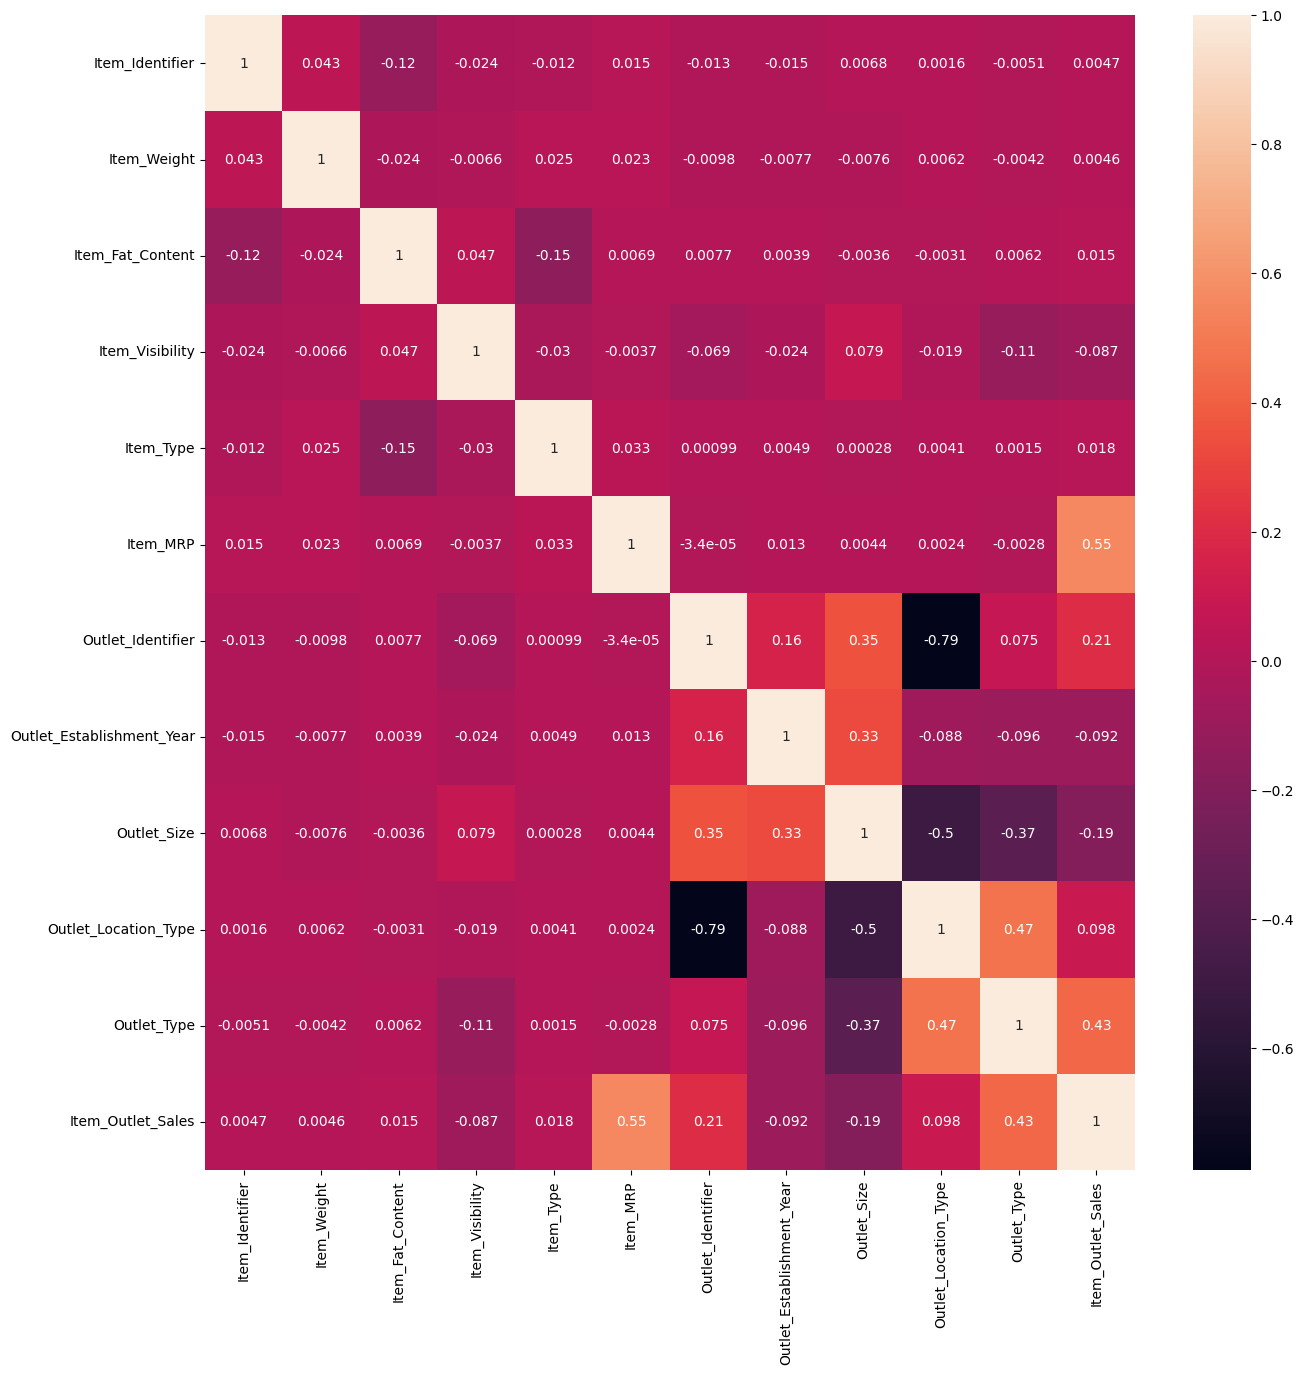

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(train.corr(), fmt='.2g', annot=True)

# Data Prepare

In [20]:
from sklearn.model_selection import train_test_split

X = train.drop(['Item_Outlet_Sales', 'Outlet_Establishment_Year'], axis=1)
y = train['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Model Selection

In [21]:
from sklearn.model_selection import GridSearchCV, KFold

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score

kf = KFold(n_splits=5, shuffle=True, random_state=10)

linreg = LinearRegression()
dtree = DecisionTreeRegressor(random_state=10)
rf = RandomForestRegressor(random_state=10)

In [22]:
model_cv = ['DecisionTreeRegressor', 'RandomForestRegressor']

dtree_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

model_tuple = {
    'LinearRegression': linreg,  
    'DecisionTreeRegressor': dtree, 
    'RandomForestRegressor': rf, 
}

param_grid = {
    'DecisionTreeRegressor': dtree_grid,
    'RandomForestRegressor': rf_grid,
}

best_params = []
score = []
for model in model_cv:
    temp = GridSearchCV(model_tuple[model], param_grid=param_grid[model], cv=kf)
    temp.fit(X_train, y_train)
    best_params.append(temp.best_params_)
    score.append(temp.score(X_test, y_test))
    
temp_df = pd.DataFrame({'model_name': model_cv, 'best_grid': best_params, 'score': score})
temp_df.set_index('model_name')
display(temp_df)

,model_name,best_grid,score
0,DecisionTreeRegressor,"{'max_depth': 7, 'max_features': 'sqrt', 'min_...",0.593694
1,RandomForestRegressor,"{'max_depth': 9, 'max_features': 'sqrt', 'min_...",0.635375


In [27]:
print(temp_df['best_grid'][1])
mae = []
mape = []
mse = []
r2 = []
rmse = []

{'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10}


# LinearRegression

In [29]:
from sklearn import metrics
import math

linreg.fit(X_train, y_train)
y_pred_linreg = linreg.predict(X_test)

mae.append(metrics.mean_absolute_error(y_test, y_pred_linreg))
mape.append(metrics.mean_absolute_percentage_error(y_test, y_pred_linreg))
mse.append(metrics.mean_squared_error(y_test, y_pred_linreg))
r2.append(metrics.r2_score(y_test, y_pred_linreg))

# DecistionTreeRegressor

In [30]:
dtree = DecisionTreeRegressor(max_depth=7, min_samples_leaf=2, min_samples_split=5, max_features='sqrt', random_state=10)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

mae.append(metrics.mean_absolute_error(y_test, y_pred_dtree))
mape.append(metrics.mean_absolute_percentage_error(y_test, y_pred_dtree))
mse.append(metrics.mean_squared_error(y_test, y_pred_dtree))
r2.append(metrics.r2_score(y_test, y_pred_dtree))

# RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(max_depth=9, min_samples_leaf=4, min_samples_split=10, max_features='sqrt', random_state=10)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mae.append(metrics.mean_absolute_error(y_test, y_pred_rf))
mape.append(metrics.mean_absolute_percentage_error(y_test, y_pred_rf))
mse.append(metrics.mean_squared_error(y_test, y_pred_rf))
r2.append(metrics.r2_score(y_test, y_pred_rf))

In [38]:
submission = pd.DataFrame({'model': ['LinearRegresion', 'DecisionTreeRegressor', 'RandomForestRegressor'], 'mae': mae, 'mape': mape, 'mse': mse, 'r2_score': r2})
submission

,model,mae,mape,mse,r2_score
0,LinearRegresion,861.221000,1.047845,1.305262e+06,0.576670
1,DecisionTreeRegressor,861.221000,1.047845,1.305262e+06,0.576670
2,RandomForestRegressor,776.046538,0.569231,1.252769e+06,0.593694
